In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [53]:
df_pca = pd.read_parquet('../Tidy/SIAP.parquet')

In [54]:
cat_cultivo = pd.read_csv('../Catalogos_API_SIAP/Cultivo.csv')
cat_cultivo = cat_cultivo.set_index('Name')['ID'].to_dict()

cat_mes = pd.read_csv('../Catalogos_API_SIAP/Mes_Agricola.csv')
cat_mes = cat_mes.set_index('Name')['ID'].to_dict()

cat_municipio = pd.read_csv('../Catalogos_API_SIAP/Municipio.csv')
cat_municipio = cat_municipio.set_index('Name')['ID'].to_dict()

cat_entidad = pd.read_csv('../Catalogos_API_SIAP/Entidad.csv')
cat_entidad = cat_entidad.set_index('Name')['ID'].to_dict()

In [55]:
# Lista de variables a convertir
obj_to_float_var = ['Superficie Sembrada', 'Superficie Cosechada', 'Produccion', 'Rendimiento']
# Eliminación de ',' character y conversión a flotante
for var in obj_to_float_var:
    df_pca[var] = df_pca[var].str.replace(',','').astype('float')

In [56]:
df_pca.head()

,Entidad,Municipio,Superficie Sembrada,Superficie Cosechada,Superficie Siniestrada,Produccion,Rendimiento,Anio,Mes,Cultivo
0,Aguascalientes,Aguascalientes,8.00,0.0,0.0,0.0,0.0,2023,Enero,Agave
1,Baja California Sur,La Paz,3.00,0.0,0.0,0.0,0.0,2023,Enero,Agave
2,Colima,Manzanillo,86.29,0.0,0.0,0.0,0.0,2023,Enero,Agave
3,Durango,Durango,13.00,0.0,0.0,0.0,0.0,2023,Enero,Agave
4,Durango,Mezquital,110.00,0.0,0.0,0.0,0.0,2023,Enero,Agave


In [57]:
df_pca['Cultivo'] = df_pca['Cultivo'].map(cat_cultivo)
df_pca['Mes'] = df_pca['Mes'].map(cat_mes)
df_pca['Municipio'] = df_pca['Municipio'].map(cat_municipio)
df_pca['Entidad'] = df_pca['Entidad'].map(cat_entidad)


In [58]:
df_pca.sample(6)

,Entidad,Municipio,Superficie Sembrada,Superficie Cosechada,Superficie Siniestrada,Produccion,Rendimiento,Anio,Mes,Cultivo
479310,21,207,881.75,83.75,0.0,2031.67,24.26,2021,8,283
986112,6,6,49.00,47.00,0.0,13.92,0.30,2018,3,110
595290,21,155,42.00,42.00,0.0,172.20,4.10,2020,3,225
4159,17,6,102.00,0.00,0.0,0.00,0.00,2023,1,78
583207,20,37,8.00,0.00,0.0,0.00,0.00,2020,2,230
609675,20,345,15.60,12.00,0.0,22.40,1.87,2020,4,230


In [59]:
df_pca.dtypes

Entidad                     int64
Municipio                   int64
Superficie Sembrada       float64
Superficie Cosechada      float64
Superficie Siniestrada    float64
Produccion                float64
Rendimiento               float64
Anio                        int64
Mes                         int64
Cultivo                     int64
dtype: object

In [60]:
df_pca = df_pca.dropna()
X = df_pca.drop(columns=['Entidad', 'Municipio', 'Anio', 'Mes', 'Cultivo'])
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [61]:
# Crear un objeto PCA con el número de componentes deseadas (puedes ajustar este número)
n_components = 2  # Por ejemplo, usa 2 componentes principales
pca = PCA(n_components=n_components)

# Realizar el PCA en los datos estandarizados
principal_components = pca.fit_transform(X_std)

# Crear un DataFrame con los resultados del PCA
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Agregar las columnas que no se incluyeron en el PCA (por ejemplo, Entidad, Municipio, Anio, Mes, Cultivo)
pca_df = pd.concat([df_pca[['Entidad', 'Municipio', 'Anio', 'Mes', 'Cultivo']], pca_df], axis=1)

# pca_df ahora contiene las componentes principales junto con las columnas originales


In [62]:
pca_df

,Entidad,Municipio,Anio,Mes,Cultivo,PC1,PC2
0,1.0,1.0,2023.0,1.0,6.0,-0.299976,-0.026203
1,3.0,70.0,2023.0,1.0,6.0,-0.300876,-0.025895
2,6.0,7.0,2023.0,1.0,6.0,-0.285874,-0.031024
3,10.0,5.0,2023.0,1.0,6.0,-0.299075,-0.026511
4,10.0,14.0,2023.0,1.0,6.0,-0.281603,-0.032485
...,...,...,...,...,...,...,...
1152211,NaN,NaN,NaN,NaN,NaN,-0.296408,-0.011589
1152273,NaN,NaN,NaN,NaN,NaN,-0.289670,-0.023399
1152275,NaN,NaN,NaN,NaN,NaN,-0.293904,0.029986
1152286,NaN,NaN,NaN,NaN,NaN,-0.240286,-0.036049


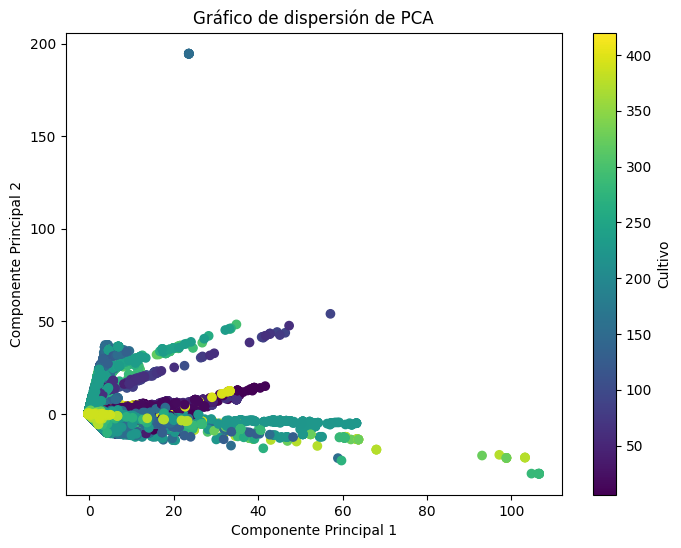

In [70]:
# Supongamos que tus componentes principales se llaman "PC1" y "PC2"
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cultivo'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfico de dispersión de PCA')

plt.colorbar(label='Cultivo')
plt.show()
